# 1. 什么是时间序列

同一统计指标数值按照时间先后顺序排列而成的数据。本质上是反映一个变量随时间序列变化的趋势。

1. 简单的例子就像是学生每一年的身高数据，这个也是一个时间序列。变量是我们的身高;每一年都不一样。
2. 我们支付宝或者微信的零钱，每一天每一个月都有一个实际的值。

# 2. 在python中如何导入时间序列数据

In [22]:
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime

plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

# Import as Dataframe
df = pd.read_csv('../datasets/a10.csv', parse_dates=['date'])
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


# 3. 面板数据

有多个时间节点，且每一个时间节点上有多个维度的数据。

# 4. 可视化时间序列

## 获得数据

In [23]:
import matplotlib.pyplot as plt

df = pd.read_csv('../datasets/a10.csv')
df['date'] = df['date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))
df.head()



,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


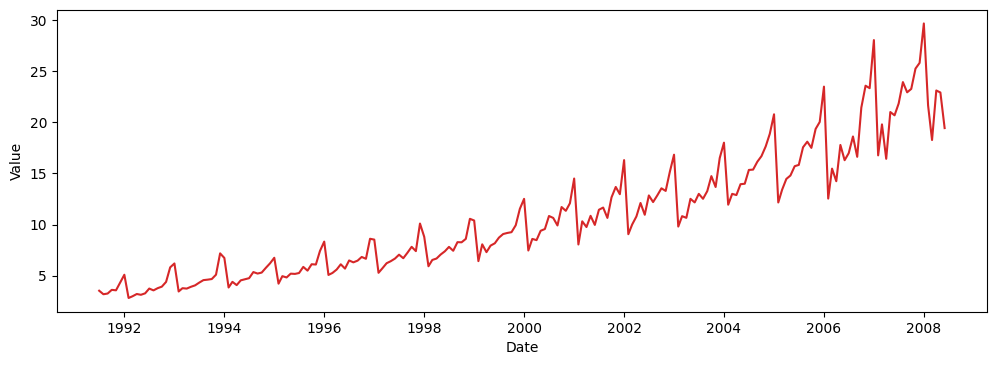

In [24]:
# 画图
def plot_df(df, x, y, title="", xlabel="Date", ylabel="Value", dpi=100):
    plt.figure(figsize=(12, 4), dpi=dpi)
    plt.plot(df[x], df[y], color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
plot_df(df, x="date", y="value")

## 区域填充图

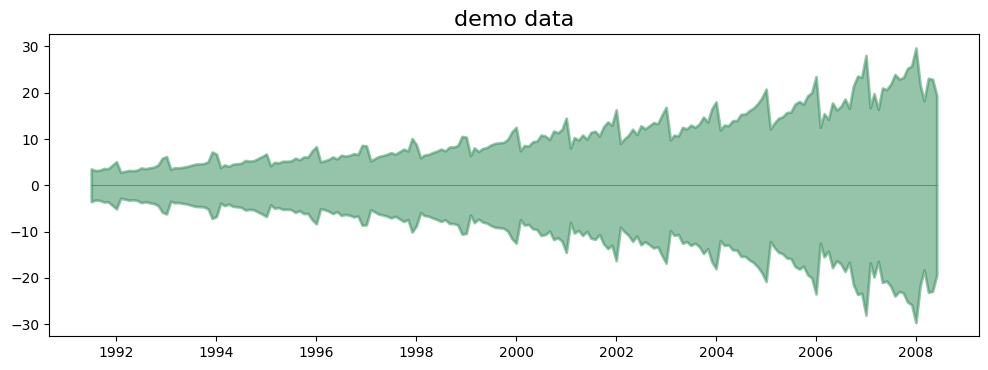

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4), dpi=100)
ax.fill_between(x=df['date'], y1=df['value'], y2=-df['value'], alpha=0.5, linewidth=2, color='seagreen')
ax.set_title("demo data", fontsize=16)
ax.hlines(y=0, xmin=np.min(df['date']), xmax=np.max(df['date']), linewidth=0.5)
plt.show()

## 季节性时间序列图


[Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12')]

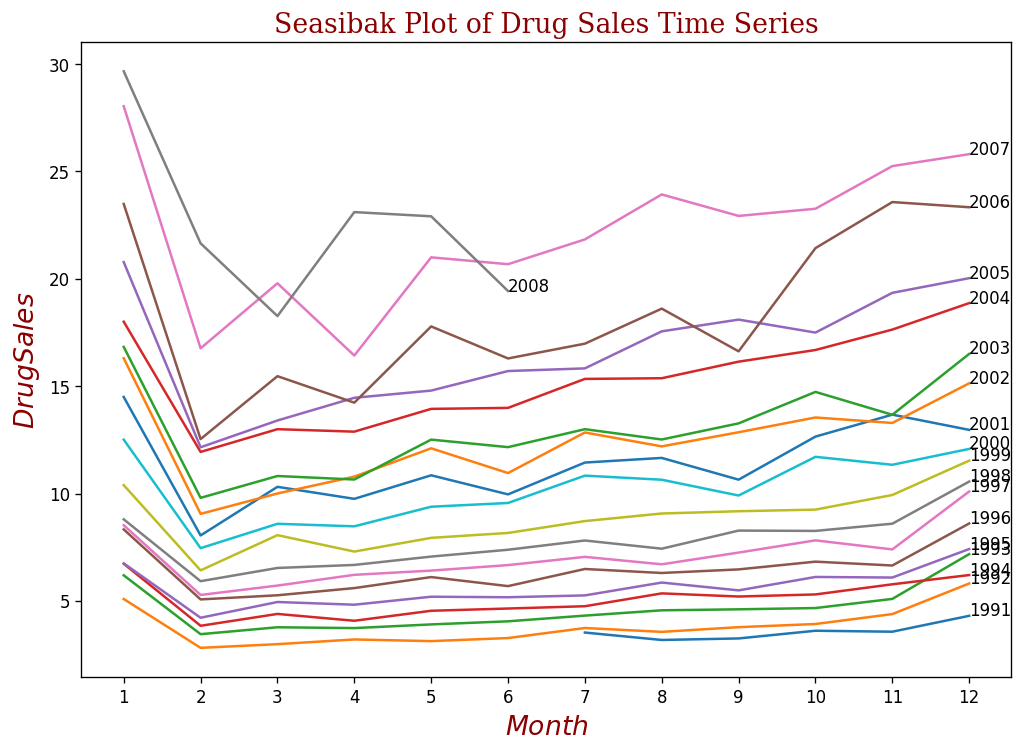

In [26]:
df['year'] = df['date'].apply(lambda x: x.year)
df['month'] = df['date'].apply(lambda x: int(x.strftime('%m')))

fig, ax = plt.subplots(figsize=(10, 7))
for index, tempyear in enumerate(df['year'].unique().tolist()):
    tempdata = df.loc[df['year'] == tempyear].sort_values(by=['date'])
    ax.plot(tempdata['month'], tempdata['value'], label=tempyear)
    ax.text(tempdata.tail(1)['month'], tempdata.tail(1)['value'], tempyear)

font = {'family': 'serif',
        'color': 'darkred',
        'weight': 'normal',
        'size': 16,
        }
ax.set_ylabel("$Drug Sales$", fontdict=font)
ax.set_xlabel('$Month$', fontdict=font)
ax.set_title("Seasibak Plot of Drug Sales Time Series",
             fontdict=font)
x_axis_ticks = np.arange(start=1, stop=13)
ax.set_xticks(x_axis_ticks)
ax.set_xticklabels(x_axis_ticks)

1. 从月的角度来看，在每年的1月到2月，毒品的销售都是骤降，3月再次上升，4月再次下降，显然，每年重复如此。
2. 从年的角度来看，毒品的销售逐年增加。

我们可以通过逐年的boxplot和逐月的boxplot观察到这些特点。

### BoxPlot

Text(0.5, 1.0, 'Month-wise BoxPlot \n(The Trend)')

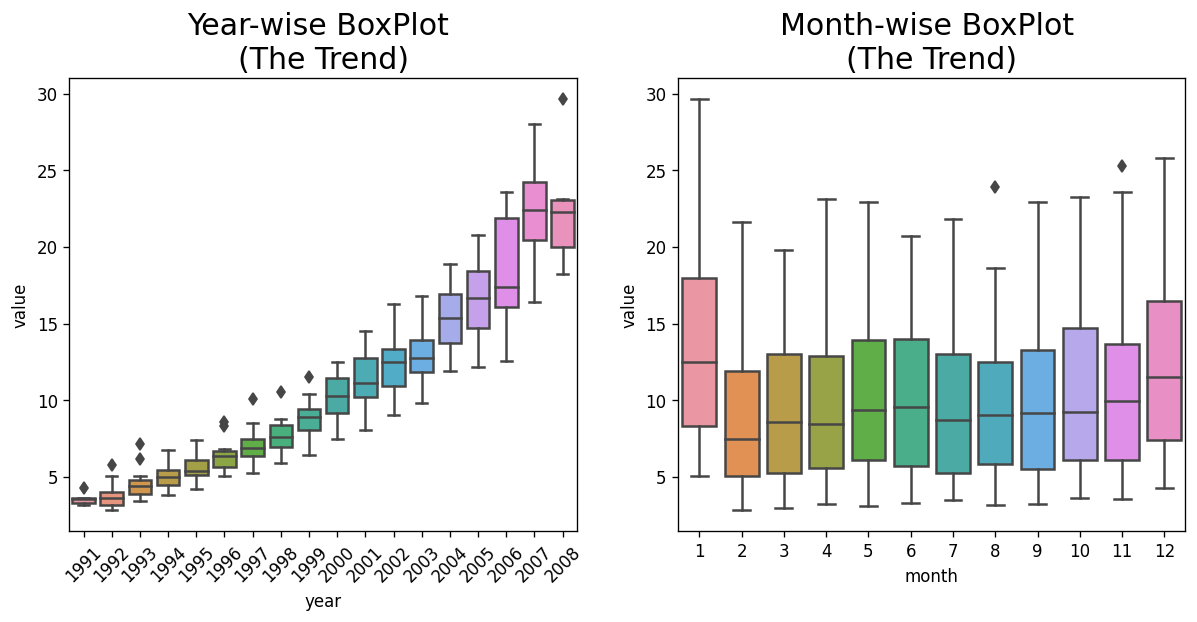

In [27]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))
sns.boxplot(x='year', y='value', data=df, ax=ax[0])
sns.boxplot(x='month', y='value', data=df, ax=ax[1])

ax[0].set_title("Year-wise BoxPlot \n(The Trend)", fontsize=18)
xlabel = ax[0].get_xticklabels()
ax[0].set_xticklabels(xlabel, rotation=45)
ax[1].set_title("Month-wise BoxPlot \n(The Trend)", fontsize=18)

1. 从boxplot可以看出来：毒品销售和年以及月份是相关的。
2. 从月份的boxplot可以看出来，1月和12月的毒品销量比较高，这个可以用假期折扣来解释。

# 5. 时间序列中的模式


任何时间序列可以可以被拆分为3个部分：
1. 趋势：趋势是比较明显的，比如极速的上升或者迅速下跌。
2. 季节性：可以在数据中看到明显的周期性，并且这个周期性和时间周期有关。这个周期可能是月，可能是季度，也可能是年。
3. 误差项。

但是不是说所有的时间序列都必须具备这3个部分。时间序列可能没有明显的趋势、可能没有明显的周期性。或者两个都没有。

因此，可以将时间序列看成趋势、周期性、误差项的组合。

<AxesSubplot:title={'center':'Trend and Seasonality'}, xlabel='date'>

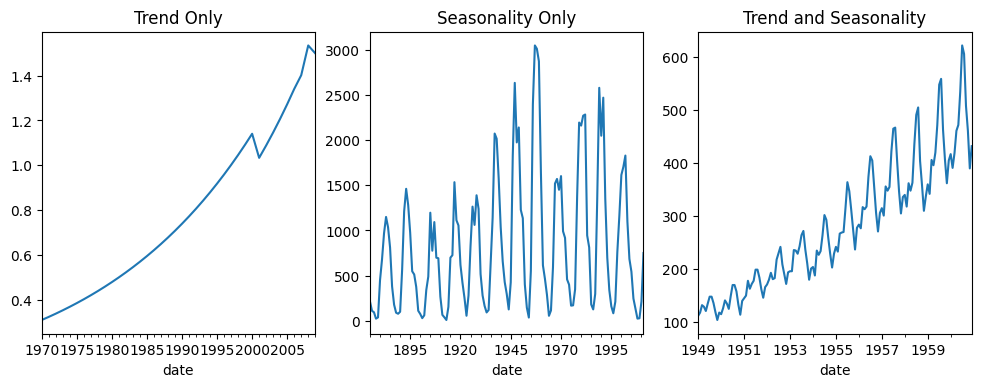

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), dpi=100)
pd.read_csv("../datasets/guinearice.csv", parse_dates=['date'], index_col=['date']).plot(title="Trend Only", legend=False,
                                                                                      ax=ax[0])
pd.read_csv("../datasets/sunspotarea.csv", parse_dates=['date'], index_col=['date']).plot(title="Seasonality Only",
                                                                                       legend=False, ax=ax[1])
pd.read_csv("../datasets/AirPassengers.csv", parse_dates=['date'], index_col=['date']).plot(title="Trend and Seasonality",
                                                                                         legend=False, ax=ax[2])


另外一个需要注意的就是循环行为，如果发现时间序列中的跌幅是有周期性的，且这个周期性只是和时间间隔有关，和特定的时间节点无关，那么就是周期性。不能称之为季节性。

# 6. 时间序列模型(加法模型和乘法模型)

基于原始的时间序列的趋势项和季节项，时间序列模型可以被分为加法模型和乘法模型.
1. 乘法型：时间序列值 = 趋势项 * 季节项 * 误差项。
2. 加法型：时间序列值 = 趋势项 + 季节项 + 误差项。

# 7. 时间序列的模式分解

对时间序列的分解，可以从趋势项、季节项、 误差项的乘法和加法的角度进行。

代码方面，我们使用`statsmodels`包的`seasonal_decompose`函数。

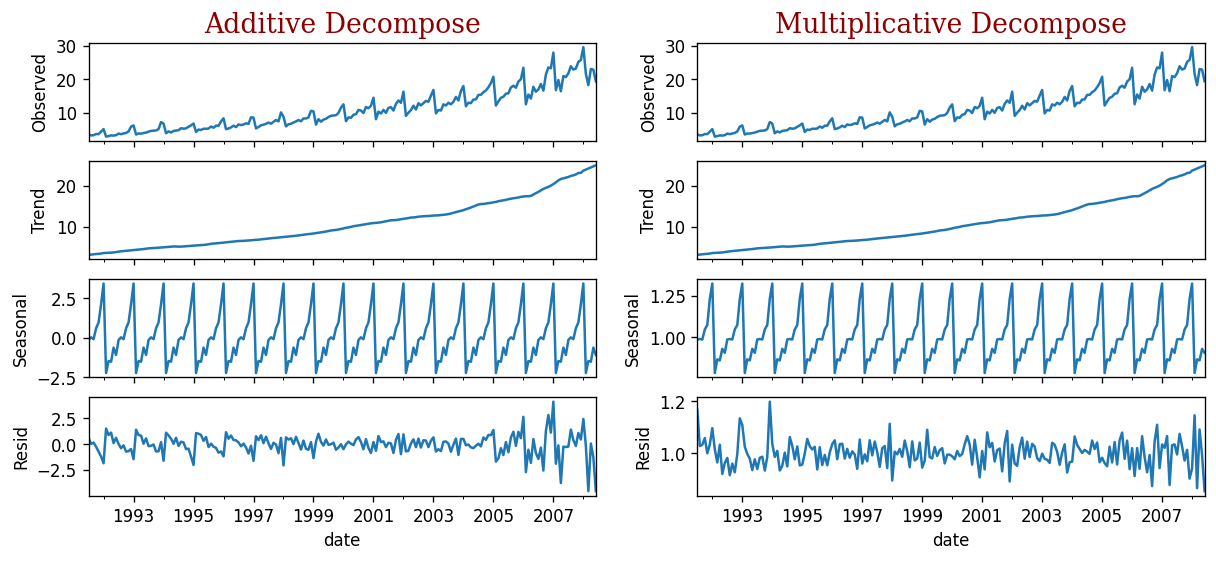

In [29]:
# 导入包
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# 导入数据
df = pd.read_csv("../datasets/a10.csv", parse_dates=['date'], index_col=['date'])

# 乘法模型
result_mul = seasonal_decompose(df['value'], model="multilicative", extrapolate_trend='freq')
result_add = seasonal_decompose(df['value'], model="additive", extrapolate_trend='freq')

# 画图
fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(12, 5), sharex=True)


def plot_decompose(result, ax, index, title, fontdict=font):
    ax[0, index].set_title(title, fontdict=fontdict)
    result.observed.plot(ax=ax[0, index])
    ax[0, index].set_ylabel("Observed")

    result.trend.plot(ax=ax[1, index])
    ax[1, index].set_ylabel("Trend")

    result.seasonal.plot(ax=ax[2, index])
    ax[2, index].set_ylabel("Seasonal")

    result.resid.plot(ax=ax[3, index])
    ax[3, index].set_ylabel("Resid")


plot_decompose(result=result_add, ax=ax, index=0, title="Additive Decompose", fontdict=font)
plot_decompose(result=result_mul, ax=ax, index=1, title="Multiplicative Decompose", fontdict=font)


1. 在上面的代码中，设置`extrapolate_trend='freq'`是为了填充 季节项、误差项中开头的缺失值。
2. 在上图中，可以发现加法模型里面的误差项还有一部分时间序列的模式没有被提取完。但是乘法模型的误差项(或者叫残差项)基本上看不出来任何信息了，说明乘法模型对这个数据来说，有更强提取数据信息的能力。
3. 乘法模型的季节项、趋势项、误差项数据都保存在`result_mul`里面。我们将这几个数据提取出来。

In [30]:
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['Seasonal', 'Trend', 'Resid', 'Actual_value']
df_reconstructed.head()

,Seasonal,Trend,Resid,Actual_value
date,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869


可以检查一下上面的数据;基本上可以确定`df_reconstructed['Seasonal'] * df_reconstructed['Trend'] * df_reconstructed['Resid'] = df_reconstructed['Actual_value']`,
或者我们用均方误差算一下：

In [31]:
value = np.sqrt(np.sum((df_reconstructed['Seasonal'] * df_reconstructed['Trend'] * df_reconstructed['Resid'] -
                        df_reconstructed['Actual_value']) ** 2))
value

1.6395253991751996e-14

# 8.平稳序列和非平稳时间序列


1. 平稳性是时间序列的一个属性，一个平稳的时间序列指的是这个时间序列和时间无关，也就是说这个时间序列不是时间的一个函数。
2. 也就是说一个时间序列是平稳的，就是这个时间序列的几个统计量：均值、方差、自相关系数都是一个常数，和时间无关。

# 9. 如何让一个时间序列平稳
1. 对一个时间序列做一次或者多次差分。
2. 季节性延迟（或者叫多阶差分）。
3. 取时间序列的第N个根。
4. 上面三种方法混合使用。

最方便最常用的平稳一个时间序列，就是多次使用一阶差分，直到时间序列平稳。

# 10.在做预测之前为什么需要对非平稳时间序列做平稳

1. 预测一个平稳的时间序列相对容易，且结果更加可靠。
2. 一个更加重要的原因是：自回归预测模型本质上是一个线性回归模型，它利用时间序列的滞后项做为预测变量。
我们都知道，在线性回归里面，如果预测变量的X都是互不相关的，那么线性回归预测的效果最好。因此对序列进行平稳化就解决了变量之间的相关性问题，
从而消除来时间序列的自相关，使得预测模型中的预测变量几乎相互独立。

现在已经知道的时间序列的平稳性的重要性，如何判断一个时间序列是否平稳呢？

# 11. 检验时间序列是否平稳

检验时间序列是否为平稳性时间序列可以有这几种方法：
1. 查看时间序列的时序图；
2. 将时间序列分为2个或者多个连续片段，然后计算对应的统计量（比如均值、方差、自相关系数等），如果片段的统计量都是明显不相等的话，说明肯定不是平稳性。
3. 不管怎么样，需要使用一个量化的指标去衡量一个时间序列是否平稳，可以使用单位根检验方法来对时间序列做平稳性检验，检验时间序列是否平稳并且具有单位根。

还有很多单位根检验方法的增强版本：
1. Augmented Dickey Fuller test(ADH Test)
2. Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)
3. Philips Perron test (PP Test)

最广泛使用的方法是`ADF test`；原假设是时间序列有单位根并且是非平稳的。如果ADF test的P-value小于显著水平（0.05），就可以拒绝原假设。
`KPSS test`和`ADH test`恰恰相反，是为了证明时间序列有一个确定的趋势。

In [32]:
from statsmodels.tsa.stattools import adfuller, kpss

df = pd.read_csv("../datasets/a10.csv", parse_dates=['date'])

# ADF test
result = adfuller(df.value.values, autolag='AIC')

print('*' * 50)
print(f"ADF Statistic: {result[0]}; p-value: {result[1]}")

for key, value in result[4].items():
    print('Crital Values:')
    print(f"{key}, {value}")

# KPSS Test

result = kpss(df.value.values, regression='c', nlags='auto')

print('*' * 50)
print(f'\nKPSS Stattistic: {result[0]:.10f}; p-value: {result[1]:.3f}')

for key, value in result[3].items():
    print('Crital Values:')
    print(f"{key}, {value}")


**************************************************
ADF Statistic: 3.1451856893067394; p-value: 1.0
Crital Values:
1%, -3.465620397124192
Crital Values:
5%, -2.8770397560752436
Crital Values:
10%, -2.5750324547306476
**************************************************

KPSS Stattistic: 2.0131256386; p-value: 0.010
Crital Values:
10%, 0.347
Crital Values:
5%, 0.463
Crital Values:
2.5%, 0.574
Crital Values:
1%, 0.739


/opt/anaconda3/envs/devc/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


# 12. 白噪声和平稳时间序列的区别

和平稳性时间序列一样，白噪声时间序列的每一个值和时间也是无关的，也就是说白噪声的均值和方差不随着时间改变。唯一一个不同点就是白噪声是完全随机的、且均值为0的时间序列。

白噪声中没有任何时间序列模式，生活中遇到的白噪声就像是FM收音机中空白声音。数学上的白噪声就是一串均值为0的完全随机的随机数。

<AxesSubplot:title={'center':'Random White Noise'}>

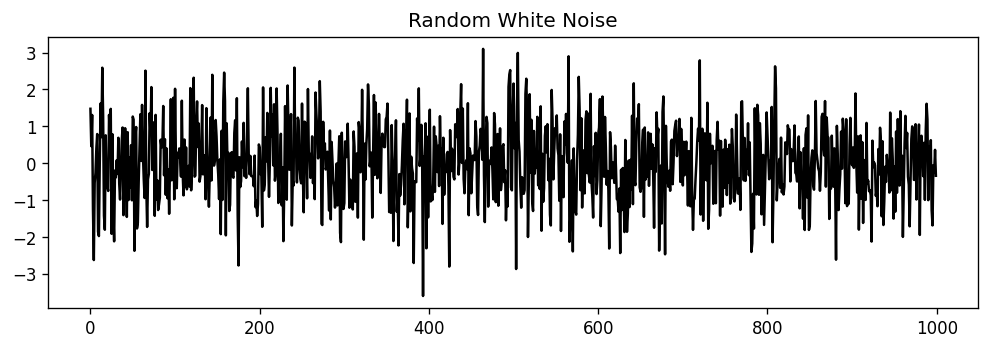

In [33]:
fig, ax = plt.subplots(figsize=(10, 3))
randval = np.random.randn(1000)
pd.Series(randval).plot(title="Random White Noise", color='k', ax=ax)

# 13. 如何去时间序列趋势

去趋势时间序列指的是从时间序列中去趋势成分。去除时间序列趋势有多种方法。

1. 从时间序列中获得最佳拟合线。可以使用线性回归来拟合时间序列，有时候可能还用得到二次项(x^2);
2. 将刚才我们提取的时间序列成分中趋势项部分移除；
3. 使用像是Baxter-King过滤器或者Hodrick-Prescott过滤器去除移动平均趋势线或者周期性成分。

Text(0.5, 1.0, 'Drug Sales detrended by subtracting the trend component')

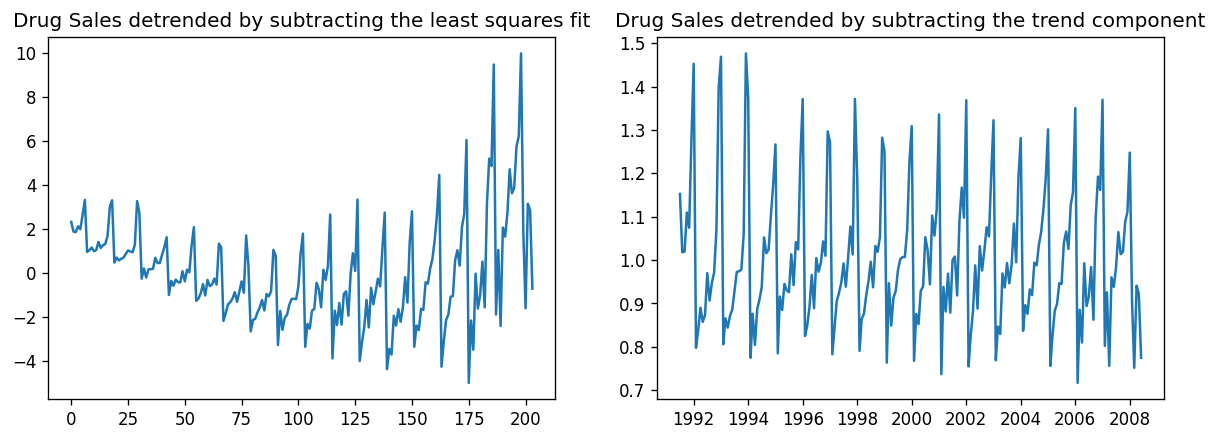

In [34]:
# use scipy: Subtract the Line of best fit
from scipy import signal

df = pd.read_csv("../datasets/a10.csv", parse_dates=['date'])
detrend = signal.detrend(df.value.values)

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))
ax[0].plot(detrend)
ax[0].set_title("Drug Sales detrended by subtracting the least squares fit")

# Using  statmodels: Subtracting the Trend Component
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv('../datasets/a10.csv', parse_dates=['date'], index_col='date')
result_mul = seasonal_decompose(df['value'], model="multilicative", extrapolate_trend='freq')
detrended = df.value.values / result_mul.trend
ax[1].plot(detrended)
ax[1].set_title("Drug Sales detrended by subtracting the trend component")

# 14. 去时间序列的季节性趋势

方法有很多，比如：

1. 对时间序列使用一个窗口长度和季节周期一样的移动平均；
2. 季节差分；
3. 使用前面的时间序列分解中的结果。

Text(0.5, 1.0, 'Drug Sales Deseasonlized')

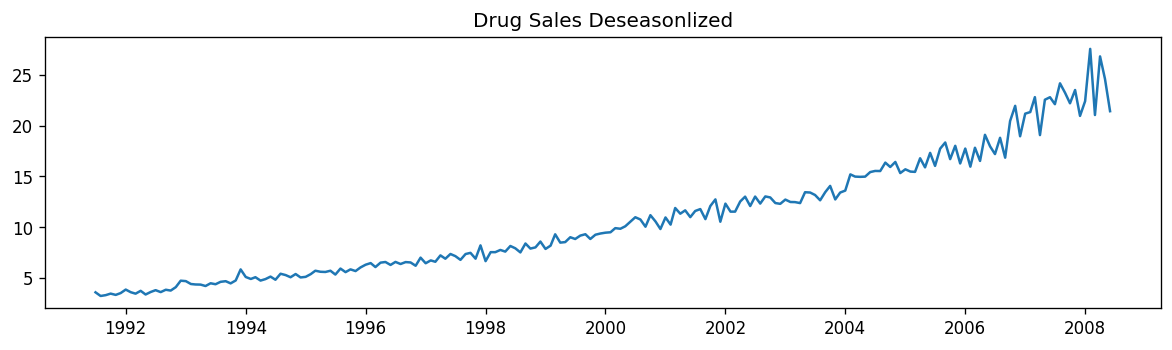

In [35]:
fig, ax = plt.subplots(figsize=(12, 3))

# Subtracing the Trend Component
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv('../datasets/a10.csv', parse_dates=['date'], index_col='date')
result_mul = seasonal_decompose(df['value'], model="multilicative", extrapolate_trend='freq')
detrended = df.value.values / result_mul.seasonal
ax.plot(detrended)
ax.set_title("Drug Sales Deseasonlized")

# 15. 检验时间序列的季节性

最常用的方式是将时间序列的图画出来，然后从图中查看重复的模式和固定时间间隔，一般周期性都是由日期或者时间决定：

1. 一天中的小时；
2. 一个月中的每天；
3. 每周的；
4. 每月的；
5. 每年的。

如果想对季节性做更加准确的季节性检验，就使用自相关函数图(ACF plot)；但是当存在相当明显的季节性模式的时候，ACF图会在季节性窗口长度的倍数处出现明显的峰值。

比如，前面的毒品销售是每月的系列，每年都有重复的模式，比如在下面的第12，第24，第36位置，都可以看到线有个小峰值。但是必须注意：在实际数据集中，这些强累的模式几乎不会被注意到，而且可能还会被噪音干扰。

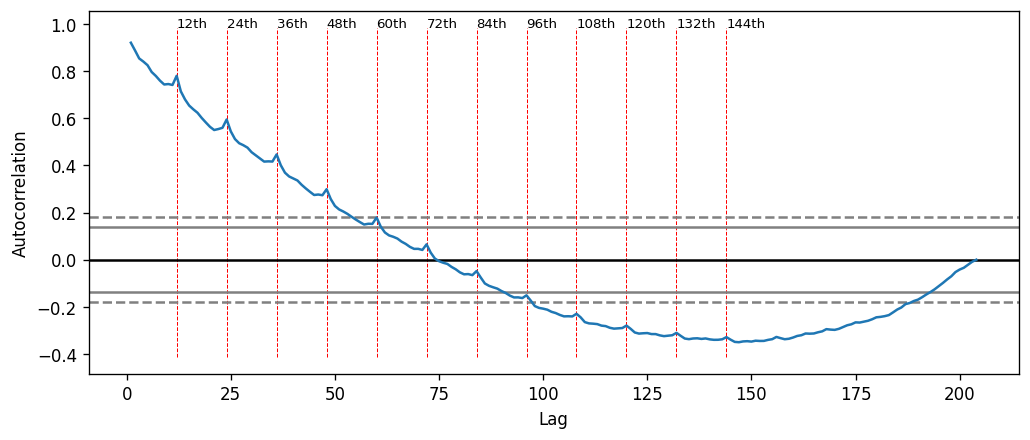

In [36]:
from pandas.plotting import autocorrelation_plot

df = pd.read_csv("../datasets/a10.csv")
fig, ax = plt.subplots(figsize=(10, 4))
autocorrelation_plot(df.value, ax=ax)

ybound = ax.get_ybound()
for i in 12 * np.arange(start=1, stop=13):
    ax.vlines(x=i, ymin=ybound[0], ymax=ybound[1], colors='red', linestyles='--', linewidth=0.6)
    ax.text(x=i, y=ybound[1], s=f"{i:d}th", fontdict={'size': 8})

ax.grid(False)

相应的，如果需要统计检验，可以使用[CH-test](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.CHTest.html#pmdarima.arima.CHTest)来决定是否需要对时间序列做季节差分。

# 16. 如何处理带有缺失值的时间序列数据

现实中的时间序列数据可能会缺少时间（比如少了几天，少了几年），这也就意味着，这些时间段内的数据没有被捕捉到或者不能用，在这些缺失的时间段范围内，测量值可能为0，这样的情况下，可以使0来填充这个时间段内的数据。
对时间序列做填充的时候，不能简单的对缺失值用均值填充，应该使用向前填充，用后一个数据去填前面的数据。
处理现实的数据，需要做很多尝试，来确定哪一个填充效果最好，比如有：
1. 向前\向后填充；
2. 线性插值、二次插值、最近邻插值、使用季节性插值。


为了衡量插值的效果，做了一次小实验，手动对数据做缺失值处理，然后使用不同方法做插值。

<AxesSubplot:title={'center':'Seasonal Mean (MSE: 2.607)'}, xlabel='date'>

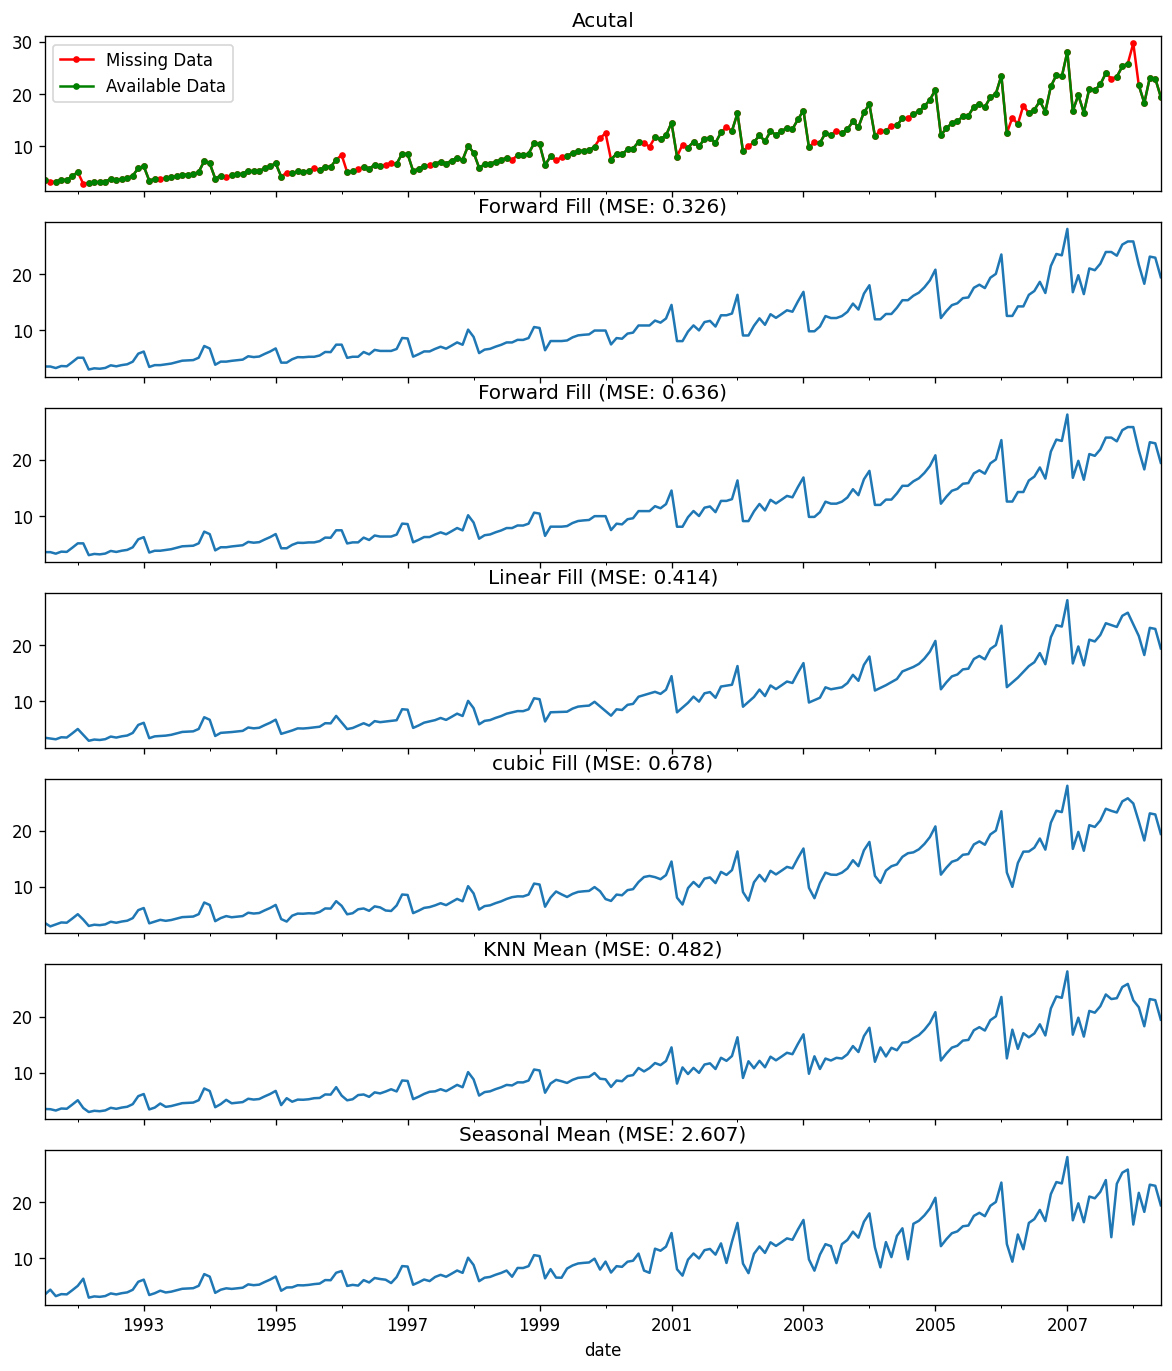

In [37]:
# 生成随机数
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error

df_orig = pd.read_csv("../datasets/a10.csv", parse_dates=['date'], index_col=['date'])

# 制作缺失值数据
np.random.seed(2021)
df = df_orig.copy()
df.iloc[np.random.randint(low=0, high=df_orig.shape[0], size=30)] = None

# 画图
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(12, 14), sharex=True)

# 1. 原始数据 -------------------------------
df_orig.plot(title="Acutal", ax=ax[0], label='Acutal', color='red', style='.-')
df.plot(ax=ax[0], label='Acutal', color='green', style='.-')
ax[0].legend(['Missing Data', 'Available Data'])

# 2. 向前填充 -------------------------------
df_ffill = df.ffill()
error = mean_squared_error(df_orig['value'], df_ffill['value'])
df_ffill['value'].plot(title=f"Forward Fill (MSE: {error:.3f})", ax=ax[1])

# 3. 向后填充 -------------------------------
df_bfill = df.bfill()
error = mean_squared_error(df_orig['value'], df_bfill['value'])
df_ffill['value'].plot(title=f"Forward Fill (MSE: {error:.3f})", ax=ax[2])

# 4. 线性插值 -------------------------------
df['rownum'] = np.arange(df.shape[0])
df_nana = df.dropna(subset=['value'])

f = interp1d(df_nana['rownum'], df_nana['value'])
df['linear_fill'] = f(df['rownum'])

error = mean_squared_error(df_orig['value'], df['linear_fill'])
df['linear_fill'].plot(title=f"Linear Fill (MSE: {error:.3f})", ax=ax[3])

# 5. 三次方插值 -------------------------------
# df['rownum'] = np.arange(df.shape[0])
# df_nana = df.dropna(subset=['value'])
f = interp1d(df_nana['rownum'], df_nana['value'], kind='cubic')
df['cubic_fill'] = f(df['rownum'])

error = mean_squared_error(df_orig['value'], df['cubic_fill'])
df['cubic_fill'].plot(title=f"cubic Fill (MSE: {error:.3f})", ax=ax[4])


# 6. 邻近均值插值 -------------------------------
def knn_mean(ts, n):
    out = np.copy(ts)

    for i, val in enumerate(ts):
        if np.isnan(val):
            n_by_2 = np.ceil(n / 2)
            lower = np.max([0, int(i - n_by_2)])
            upper = np.min([len(ts) + 1, int(i + n_by_2)])
            ts_near = np.concatenate([ts[lower:i], ts[i:upper]])
            out[i] = np.nanmean(ts_near)

    return out


df['knn_mean'] = knn_mean(df.value.values, 8)
error = mean_squared_error(df_orig['value'], df['knn_mean'])
df['knn_mean'].plot(title=f"KNN Mean (MSE: {error:.3f})", ax=ax[5])


# 7.季节性均值插值 -------------------------------

def seasonal_mean(ts, n, lr=0.7):
    """
    计算时间序列每一个季节性的均值，填充到季节性里面的缺失值。
    ts：一个时间序列；
    n: 季节性的周期
    """
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            ts_seas = ts[i - 1::-n]
            if np.isnan(np.nanmean(ts_seas)):
                ts_seas = np.concatenate(ts[i - 1::-n], ts[i::n])
            out[i] = np.nanmean(ts_seas) * lr

    return out


df['seasonal_mean'] = seasonal_mean(df.value, n=12, lr=1.25)
error = mean_squared_error(df_orig['value'], df['seasonal_mean'])
df['seasonal_mean'].plot(title=f"Seasonal Mean (MSE: {error:.3f})", ax=ax[6])



填充缺失值还有很多方法，填充的效果是取决于你对填充精度的要求。

1. 如果还有很多辅助变量，可以使用随机森林或者k邻近等模型做预测填充；
2. 可以使用过去的数据填充未来的；可以使用现在的数据去填充过去的。
3. 利用时间序列的季节性填充数据；
4. 利用时间序列的周期性对数据u哦填充。

# 17. 什么是自相关和偏自相关

1. 自相关是时间序列和它自己滞后n阶时序数据的相关性。如果一个时间序列有显著的自相关性，说明使用历史数据做预测效果会非常好。
2. 偏自相关性是和自相关系数差不多，但是不包括中间滞后的相关贡献。

Text(0.5, 1.0, 'pacf')

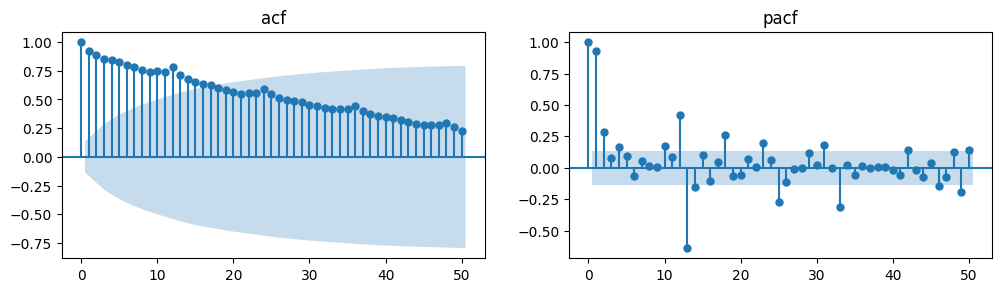

In [38]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = pd.read_csv('../datasets/a10.csv')

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3), dpi=100)
plot_acf(df.value.tolist(), lags=50, ax=ax[0])
ax[0].set_title("acf")
plot_pacf(df.value.tolist(), lags=50, ax=ax[1])
ax[1].set_title("pacf")

# 18. 如何计算偏自相关

有一个时间序列叫$Y_t$,他的一阶滞后叫$Y_{t-1}$，他的二阶滞后叫$Y_{t-2}$，他的三阶滞后叫$Y_{t-3}$。

这里有一个公式：$Y_t = \alpha_0 + \alpha_1 Y_{t-1} + \alpha_2 Y_{t-2}+ \alpha_3 Y_{t-3} $.

那么这里$\alpha_3$就是第三阶偏自相关系数。

# 19.滞后项画图

滞后项画图，就是一个时间序列和他自己滞后n阶的散点图，通常可以用来检查自相关性，如果可以从图中看到一些相关性，说明数据有一点相关性的。如果从滞后项图看不出来什么数据信息，很有可能说明数据是白噪声。

Text(0.5, 1.05, 'Lag Plots of Drug Sales')

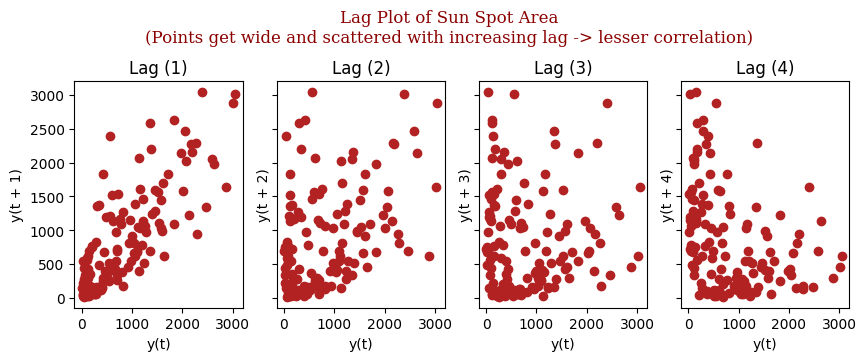

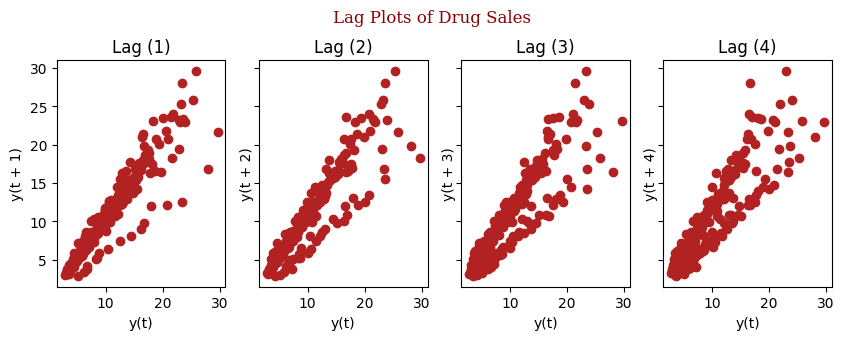

In [39]:
from pandas.plotting import lag_plot

# import data
ss = pd.read_csv("../datasets/sunspotarea.csv")
a10 = pd.read_csv("../datasets/a10.csv")

# plot Sun Spot Area
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(10, 3), sharex=True, sharey=True, dpi=100)

for i, ax in enumerate(ax.flatten()):
    lag_plot(ss['value'], lag=i + 1, ax=ax, c='firebrick')
    ax.set_title(f"Lag ({i + 1})")
fig.suptitle("Lag Plot of Sun Spot Area\n(Points get wide and scattered with increasing lag -> lesser correlation)",
             fontdict=font, y=1.12)

# plot  Drugs Sales
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(10, 3), sharex=True, sharey=True, dpi=100)

for i, ax in enumerate(ax.flatten()):
    lag_plot(a10['value'], lag=i + 1, ax=ax, c='firebrick')
    ax.set_title(f"Lag ({i + 1})")
fig.suptitle("Lag Plots of Drug Sales", fontdict=font, y=1.05)

# 20.如何对时间序列做平滑

对时间序列做平滑的优点：
1. 减少噪声对时间序列的影响；获得除去噪声后的时间序列数据；
2. 时间序列平滑后的数据可以用来解释原序列的一些特征；
3. 更好的可视化潜在的趋势。

如何平滑时间序列：
1. 移动平均；
2. 做一个局部平滑（LOESS）；
3. 做一个局部加权回归（LOWESS ）。

做移动平均的时候，需要注意窗口的大小。如果窗口过大，导致时间序列过于平滑，以至于还消除了一些其他信息。

LOESS是局部回归的意思，取局部数据做回归。

Text(0.5, 0.95, 'How to Smoothen a Time Series')

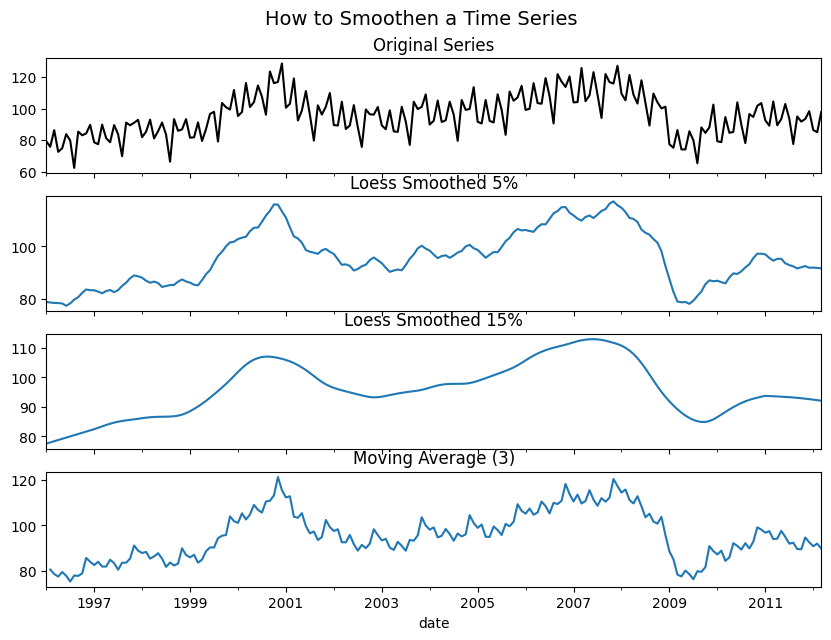

In [40]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# 导入数据
df_orig = pd.read_csv("../datasets/elecequip.csv", parse_dates=['date'], index_col=['date'])

# 1. 移动平均
df_ma = df_orig.value.rolling(3, center=True, closed='both').mean()

# 2. loess 平滑 (5% and 15%)
# df_loess_5 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value))[:,1]), index=df_orig.index, columns=['value'])
df_loess_5 = pd.DataFrame(lowess(endog=df_orig.value, exog=np.arange(len(df_orig.value)), frac=0.05)[:,1],index=df_orig.index, columns=['value'])
df_loess_15 = pd.DataFrame(lowess(endog=df_orig.value, exog=np.arange(len(df_orig.value)), frac=0.15)[:,1],index=df_orig.index, columns=['value'])

# plot
fig, ax = plt.subplots(4,1, figsize=(10, 7), sharex=True, dpi=100)
df_orig['value'].plot(ax=ax[0], color='k', title='Original Series')
df_loess_5['value'].plot(ax=ax[1], title='Loess Smoothed 5%')
df_loess_15['value'].plot(ax=ax[2], title='Loess Smoothed 15%')
df_ma.plot(ax=ax[3], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)

